<a href="https://colab.research.google.com/github/Khalil-Salama/Car_insurance-_claim/blob/main/Insurance_car_claim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- Stakeholder
 - Insurance company
- Task
 - To Know them which feature produces the best accuracy for predicting whether a customer will make a car insurance claim. based on the data they provided us with.

Features dictionary

- id: Unique client identifier

- age: Client's age

- gender:	Client's gender

- driving experience: Years the client has been driving:

- education:	Client's level of education:

- income:	Client's income level

- credit_score:	Client's credit score (between zero and one)

- vehicle_ownership	Client's vehicle ownership status

 - 0: Does not own their vehilce (paying off finance)

 - 1: Owns their vehicle

- vehcile_year:	Year of vehicle registration:

 - 0: Before 2015
 - 1: 2015 or later

- married:	Client's marital status:
 - 0: Not married
 - 1: Married

- children:	Client's number of children

- postal_code:	Client's postal code

- annual_mileage:	Number of miles driven by the client each year
- vehicle_type	Type of car:
 - 0: Sedan
 - 1: Sports car

- speeding_violations:	Total number of speeding violations received by the client

- duis:	Number of times the client has been caught driving under the influence of alcohol

- past_accidents:	Total number of previous accidents the client has been involved in

- outcome:	Whether the client made a claim on their car insurance (response variable):

 - 0: No claim
 - 1: Made a claim

In [1]:
###mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
###imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
fpath='/content/drive/MyDrive/Colab Notebooks/AXSOSACADEMY/05-IntermediateML/Car_Insurance_Claim.csv'
df=pd.read_csv(fpath)
df.head()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


In [4]:
###Getting data frame summery
def summarize_df(df_):
    df = df_.copy()
    report = pd.DataFrame({'dtype':df.dtypes,'null counts': df.isna().sum(),'null(%)': df.isna().sum()/len(df)*100,
                        'nunique':df.nunique(),"min":df.min(),'max':df.max()})
    report.index.name='Column'
    return report.reset_index()
display(summarize_df(df))
display((df.info()))

,Column,dtype,null counts,null(%),nunique,min,max
0,ID,int64,0,0.00,10000,101,999976
1,AGE,object,0,0.00,4,16-25,65+
2,GENDER,object,0,0.00,2,female,male
3,RACE,object,0,0.00,2,majority,minority
4,DRIVING_EXPERIENCE,object,0,0.00,4,0-9y,30y+
5,EDUCATION,object,0,0.00,3,high school,university
6,INCOME,object,0,0.00,4,middle class,working class
7,CREDIT_SCORE,float64,982,9.82,9018,0.053358,0.960819
8,VEHICLE_OWNERSHIP,float64,0,0.00,2,0.0,1.0
9,VEHICLE_YEAR,object,0,0.00,2,after 2015,before 2015


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10000 non-null  int64  
 1   AGE                  10000 non-null  object 
 2   GENDER               10000 non-null  object 
 3   RACE                 10000 non-null  object 
 4   DRIVING_EXPERIENCE   10000 non-null  object 
 5   EDUCATION            10000 non-null  object 
 6   INCOME               10000 non-null  object 
 7   CREDIT_SCORE         9018 non-null   float64
 8   VEHICLE_OWNERSHIP    10000 non-null  float64
 9   VEHICLE_YEAR         10000 non-null  object 
 10  MARRIED              10000 non-null  float64
 11  CHILDREN             10000 non-null  float64
 12  POSTAL_CODE          10000 non-null  int64  
 13  ANNUAL_MILEAGE       9043 non-null   float64
 14  VEHICLE_TYPE         10000 non-null  object 
 15  SPEEDING_VIOLATIONS  10000 non-null  

None

- We have 10,000 rows
- We have 19 columns 11 numeric columns and 8 object columns
- We have Null values in Credit score and in Annual milleage

#### Checking for duplicates

In [5]:
###Checking for duplicates
df.duplicated().sum()

np.int64(0)

- No Duplicates were found

#### Dropping features that dont give us useful information for modeling

##### Dropping column ID because it represents the ID number of each indvisual 10000 nunique


In [6]:
###Dropping ID feature
df.drop(columns=['ID'],inplace=True)

##### Dropping column Credit score it represents the credit score for each indivisual 9018 nunique and the rest is Nulls.

In [7]:
###Dropping column credit score
df.drop(columns=['CREDIT_SCORE'],inplace=True)

##### Droping column postal code because it dosent give us any usefull information about our analysis.

In [8]:
###dropping postal code
df.drop(columns=['POSTAL_CODE'],inplace=True)

#### Checking Categorial inconsistancies

In [9]:
##Cat_cols_filter
Cat_cols=df.select_dtypes(include='object').columns
Cat_cols

Index(['AGE', 'GENDER', 'RACE', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME',
       'VEHICLE_YEAR', 'VEHICLE_TYPE'],
      dtype='object')

In [10]:
###loop to check value counts for cat_cols
for col in Cat_cols:
  print(df[col].value_counts())

AGE
26-39    3063
40-64    2931
16-25    2016
65+      1990
Name: count, dtype: int64
GENDER
female    5010
male      4990
Name: count, dtype: int64
RACE
majority    9012
minority     988
Name: count, dtype: int64
DRIVING_EXPERIENCE
0-9y      3530
10-19y    3299
20-29y    2119
30y+      1052
Name: count, dtype: int64
EDUCATION
high school    4157
university     3928
none           1915
Name: count, dtype: int64
INCOME
upper class      4336
middle class     2138
poverty          1814
working class    1712
Name: count, dtype: int64
VEHICLE_YEAR
before 2015    6967
after 2015     3033
Name: count, dtype: int64
VEHICLE_TYPE
sedan         9523
sports car     477
Name: count, dtype: int64


- All categorical features have no inconsistancies and nothing needs to be converted to numerical type
- No null values in categorical features

#### Checking numerical features

In [11]:
###num col fillter
num_cols=df.select_dtypes(include='number').columns
num_cols

Index(['VEHICLE_OWNERSHIP', 'MARRIED', 'CHILDREN', 'ANNUAL_MILEAGE',
       'SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS', 'OUTCOME'],
      dtype='object')

In [12]:
###Making a loop to describe num cols
for col in num_cols:
  print(df[col].describe())
  print()

count    10000.000000
mean         0.697000
std          0.459578
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: VEHICLE_OWNERSHIP, dtype: float64

count    10000.000000
mean         0.498200
std          0.500022
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: MARRIED, dtype: float64

count    10000.000000
mean         0.688800
std          0.463008
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: CHILDREN, dtype: float64

count     9043.000000
mean     11697.003207
std       2818.434528
min       2000.000000
25%      10000.000000
50%      12000.000000
75%      14000.000000
max      22000.000000
Name: ANNUAL_MILEAGE, dtype: float64

count    10000.000000
mean         1.482900
std          2.241966
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000


#### Checking for null values

In [15]:
###Display a data frame to show null values and there percentge
null_sums=df.isna().sum()
null_columns= null_sums[null_sums>0]
print(null_columns)
###Null values percentge
null_sums_percentage=null_sums/len(df)
null_sums_percentage[null_sums_percentage>0]

ANNUAL_MILEAGE    957
dtype: int64


,0
ANNUAL_MILEAGE,0.0957


- Annual mileage has 957 null values about 10%
- Going to impute them with the mean using simple imputer through the numeric pipeline

### Visulaizing

#### definisions

In [21]:
"""UNIVARIATE PLOTTING FUNCTIONS FOR EDA"""
# Categorial
# Add the print statements to the function
def explore_categorical(df, x, fillna = True, placeholder = 'MISSING',
                        figsize = (6,4), order = None, palette = None): # Added palette parameter
  """Creates a seaborn countplot with the option to temporarily fill missing values
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # Before filling nulls, save null value counts and percent for printing
  null_count = temp_df[x].isna().sum()
  null_perc = null_count/len(temp_df)* 100
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  # Create figure with desired figsize
  fig, ax = plt.subplots(figsize=figsize)
  # Plotting a count plot
  sns.countplot(data=temp_df, x=x, ax=ax, order=order, palette=palette, hue=x, legend=False) # Added palette, hue=x, and legend=False to address FutureWarning

  # Rotate Tick Labels for long names
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  # Add a title with the feature name included
  ax.set_title(f"Column: {x}", fontweight='bold')

  # Fix layout and show plot (before print statements)
  fig.tight_layout()
  plt.show()

  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")
  # First find value counts of feature
  val_counts = temp_df[x].value_counts(dropna=False)
  # Define the most common value
  most_common_val = val_counts.index[0]
  # Define the frequency of the most common value
  freq = val_counts.values[0]
  # Calculate the percentage of the most common value
  perc_most_common = freq / len(temp_df) * 100
  # Print the results
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, ax

# Numeric
def explore_numeric(df, x, figsize=(6,5), palette = None): # Added palette parameter
  """Creates a seaborn histplot and boxplot with a share x-axis,
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  Source:{PASTE IN FINAL LESSON LINK}
  """

  ## Save null value counts and percent for printing
  null_count = df[x].isna().sum()
  null_perc = null_count/len(df)* 100


  ## Making our figure with gridspec for subplots
  gridspec = {'height_ratios':[0.7,0.3]}
  fig, axes = plt.subplots(nrows=2, figsize=figsize,
                           sharex=True, gridspec_kw=gridspec)
  # Histogram on Top
  sns.histplot(data=df, x=x, ax=axes[0], palette=palette) # Added palette

  # Boxplot on Bottom
  sns.boxplot(data=df, x=x, ax=axes[1], palette=palette) # Added palette

  ## Adding a title
  axes[0].set_title(f"Column: {x}", fontweight='bold')

  ## Adjusting subplots to best fill Figure
  fig.tight_layout()

  # Ensure plot is shown before message
  plt.show()


  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = df[x].nunique()
  print(f"- Unique Values: {nunique}")


  # Get the most most common value, its count as # and as %
  most_common_val_count = df[x].value_counts(dropna=False).head(1)
  most_common_val = most_common_val_count.index[0]
  freq = most_common_val_count.values[0]
  perc_most_common = freq / len(df) * 100

  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")

  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, axes

  # explore_categorical(df,feature);

  # explore_numeric(df,feature);


In [26]:
"""MULTIVARIATE PLOTTING FUNCTIONS VS. NUMERIC TARGET"""

# Updating function
def plot_categorical_vs_target(df, x, y, figsize=(6,4),
                            fillna = True, placeholder = 'MISSING',
                            order = None, target_type='reg'):
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  # or drop nulls prevent unwanted 'nan' group in stripplot
  else:
    temp_df = temp_df.dropna(subset=[x])
  # Create the figure and subplots
  fig, ax = plt.subplots(figsize=figsize)
  # REGRESSION-TARGET PLOT
  if target_type=='reg': #Added if statement here
    # Barplot
    sns.barplot(data=temp_df, x=x, y=y, ax=ax, order=order, alpha=0.6,
                linewidth=1, edgecolor='black', errorbar=None)
    # Boxplot
    sns.stripplot(data=temp_df, x=x, y=y, hue=x, ax=ax,
                  order=order, hue_order=order, legend=False,
                  edgecolor='white', linewidth=0.5,
                  size=3,zorder=0)
  # CLASSIFICATION-TARGET PLOT # This is the new code for the classification task
  elif target_type=='class':
    ax = sns.histplot(data=temp_df, hue=y, x=x, stat='percent',  multiple='fill')
  # Rotate xlabels
  ax.set_xticks(ax.get_xticks()) # Added this to prevent a bug
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  # Add a title
  ax.set_title(f"{x} vs. {y}")
  fig.tight_layout()
  return fig, ax


def plot_numeric_vs_target(df, x, y, figsize=(6,4),
                           target_type='reg', estimator='mean',
                           errorbar='ci',sorted=False,ascending=False,
                           **kwargs): # kwargs for sns.regplot

  nulls = df[[x,y]].isna().sum()
  if nulls.sum()>0:
    print(f"- Excluding {nulls.sum()} NaN's")
    # print(nulls)
    temp_df = df.dropna(subset=[x,y,])
  else:
    temp_df = df
  # Create the figure
  fig, ax = plt.subplots(figsize=figsize)

  # REGRESSION-TARGET PLOT
  if 'reg' in target_type:
    # Calculate the correlation
    corr = df[[x,y]].corr().round(2)
    r = corr.loc[x,y]
    # Plot the data
    scatter_kws={'ec':'white','lw':1,'alpha':0.8}
    sns.regplot(data=temp_df, x=x, y=y, ax=ax, scatter_kws=scatter_kws, **kwargs) # Included the new argument within the sns.regplot function
    ## Add the title with the correlation
    ax.set_title(f"{x} vs. {y} (r = {r})")

  # CLASSIFICATION-TARGET PLOT
  elif 'class' in target_type:

    # Sort the groups by median/mean
    if sorted == True:

      if estimator == 'median':
        group_vals = temp_df.groupby(y)[x].median()
      elif estimator =='mean':
        group_vals = temp_df.groupby(y)[x].mean()

      ## Sort values
      group_vals = group_vals.sort_values(ascending=ascending)
      order = group_vals.index

    else:
      # Set order to None if not calcualted
      order = None


    # Left Subplot (barplot)
    sns.barplot(data=temp_df, x=y, y=x, order=order,  estimator=estimator,
                errorbar=errorbar, ax=ax, **kwargs)

    # Add title
    ax.set_title(f"{x} vs. {y}")

    # rotate xaxis labels
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


  # Final Adjustments & return
  fig.tight_layout()
  fig.show()
  return fig, ax

#### visualizations

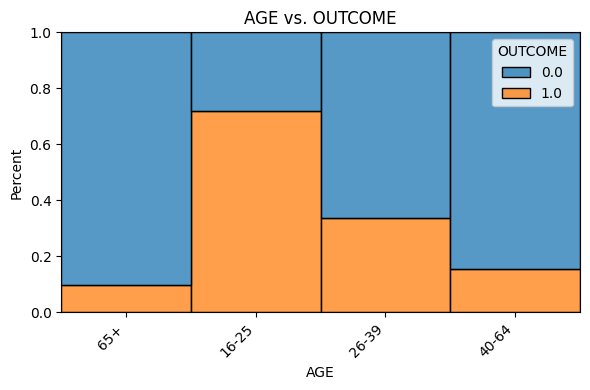

In [29]:
feature= 'AGE'
plot_categorical_vs_target(df, 'AGE', 'OUTCOME', target_type='class');

- Age group between 16 and 25 has the biggest number of insurance claim followed by age group 26 to 39

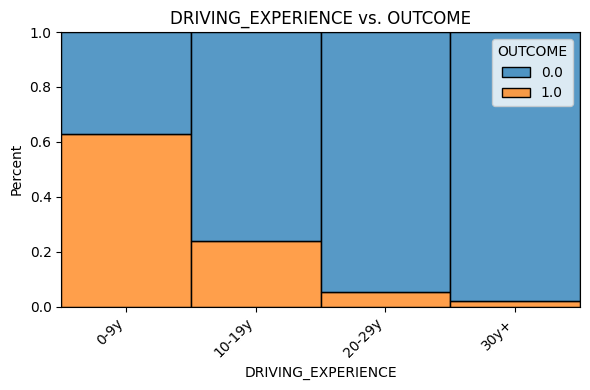

In [31]:
feature= 'DRIVING_EXPERIENCE'
plot_categorical_vs_target(df, 'DRIVING_EXPERIENCE', 'OUTCOME', target_type='class');

- The lowest driving experiance between 0 and 9 has the highest insurance claims

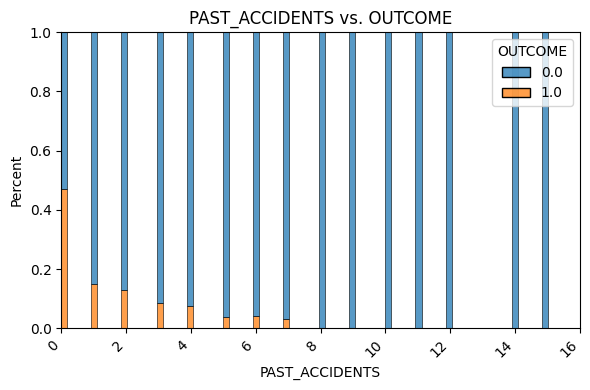

In [35]:
feature= 'PAST_ACCIDENTS'
plot_categorical_vs_target(df, 'PAST_ACCIDENTS', 'OUTCOME', target_type='class');

- People how had accidents in the past have zero claims (the more accisents the cleint had in the past the less chance he/she will make an accident again)

### Data preprossing

#### Defining X and y

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import make_pipeline

y= df['OUTCOME']
X = df.loc[ :, "AGE":"PAST_ACCIDENTS"]
###runing the X_train, X_test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

###Display X_train, Y_train
display(X_train.head(3), y_train.head(3))
display(y_train.value_counts())

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS
4901,40-64,male,majority,0-9y,high school,upper class,1.0,before 2015,1.0,1.0,NaN,sedan,0,0,0
4375,16-25,female,majority,0-9y,none,poverty,1.0,before 2015,0.0,0.0,12000.0,sedan,0,0,0
6698,40-64,male,majority,10-19y,university,upper class,1.0,before 2015,1.0,1.0,NaN,sedan,0,0,3


,OUTCOME
4901,1.0
4375,0.0
6698,0.0


,count
OUTCOME,
0.0,5144
1.0,2356


In [38]:
# Getting the shape of X
X_train.shape, X_test.shape

((7500, 15), (2500, 15))

In [39]:
# Checking the class balance
print(y_train.value_counts())
print(y_train.value_counts(normalize=True))

OUTCOME
0.0    5144
1.0    2356
Name: count, dtype: int64
OUTCOME
0.0    0.685867
1.0    0.314133
Name: proportion, dtype: float64


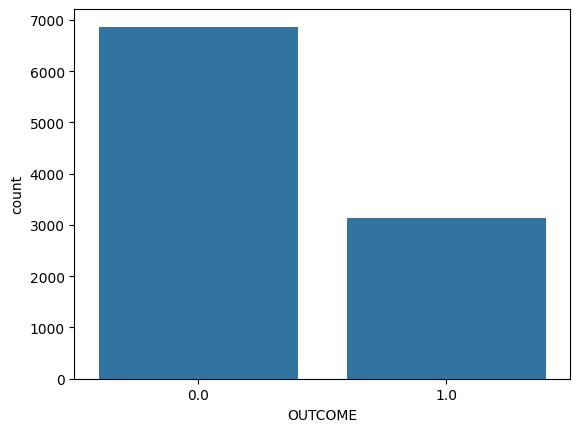

In [40]:
###Visualizing the balance between of OUTCOME
sns.countplot(data=df, x='OUTCOME');


- The class isn't perfectly balance we have about 68% of class 0 (no claims) and about 32% of class 1 (yes claims)